# Sentiment analysis of Yelp restaurant reviews

![](https://camo.githubusercontent.com/ba46f53e744f8b0bb470b8740fce3a1990c151c4/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f3830302f312a45573776554834584c4353496957416d4a4c765638672e6a706567)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li>
<li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li>
<li><span><a href="#The-stars-distribution" data-toc-modified-id="The stars distribution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The stars distribution</a></span></li>
<li><span><a href="#Word-Cloud" data-toc-modified-id="Word Cloud-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Word Cloud</a></span>
<ul>
    <li><span><a href="#Positive-review-word-cloud" data-toc-modified-id="Positive review word cloud"> <span class="toc-item-num">&nbsp;&nbsp;</span>Positive review word cloud</a></span></li>
    <li><span><a href="#Negative-review-word-cloud" data-toc-modified-id="Negative review word cloud"> <span class="toc-item-num">&nbsp;&nbsp;</span>Negative review word cloud</a></span></li>
    </ul></li>
    <li><span><a href="#Split-the-data-into-train-and-test-set" data-toc-modified-id="Split the data into train and test set-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Split the data into train and test set</a></span></li>
    <li><span><a href="#Preprocessing-the-data" data-toc-modified-id="Preprocessing the data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Preprocessing the data</a></span></li>
<li><span><a href="#Vectorizing-the-text-using-TF_IDF" data-toc-modified-id="Vectorizing the text using TF_IDF-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Vectorizing the text using TF_IDF</a></span></li>

<li><span><a href="#Let's-Smote" data-toc-modified-id="Let's Smote-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Let's Smote</a></span></li>
<li><span><a href="#Modeling" data-toc-modified-id=" Modeling-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Modeling</a></span>
<ul>
   <li><span><a href="#1.-Logistic-Regression" data-toc-modified-id="1. Logistic Regression"><span class="toc-item-num">&nbsp;&nbsp;</span>1. Logistic Regression</a></span>
       <ul>
           <li><span><a href="#Model-Evaluation" data-toc-modified-id="Model Evaluation"> <span class="toc-item-num">&nbsp;&nbsp;</span>Model Evaluation</a></span></li></ul>
   <li><span><a href="#2.-Random-Forest" data-toc-modified-id="2. Random Forest"><span class="toc-item-num">&nbsp;&nbsp;</span>2. Random Forest</a></span></li>
   <li><span><a href="#3.-XGboost" data-toc-modified-id="3. XGboost"><span class="toc-item-num">&nbsp;&nbsp;</span>3. XGboost</a>    </span></li>
</ul></li>
<li><span><a href="#Testing" data-toc-modified-id="Testing-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Testing</a></span></li>
 </ul></div>

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/toronto-business/toronto.csv
/kaggle/input/datayelp/yelp_review.csv/yelp_review.csv
/kaggle/input/datayelp/yelp_business.csv/yelp_business.csv
/kaggle/input/rest-rev-toronto/Rest_rev_toronto.csv
/kaggle/input/madness/m.jpg
/kaggle/input/positive/smile.png


# Introduction

****Restaurants owners always want to know how customers think about the quality of their services in order to improve their business. Yelp users may post their reviews and ratings on restaurants and simply express their thoughts on other reviews. Knowing the user's experiences on the variety of criteria such as food quality, service, ambience, discounts is very important for owners of the businesses.The goal of this project is to be able to automatically classify reviews as positive and negative in order to derive the attitude of a user about the specific restaurants.****

# Data
****Yelp Restaurant review dataset will be used to do the sentiment classification using TF-IDF model. Yelp dataset includes five tables. We have used the business and review tables to create another small table that contains information of Toronto restaurants' reviews to ease the computaional process.  ****

In [4]:
# read the data
df = pd.read_csv("/kaggle/input/rest-rev-toronto/Rest_rev_toronto.csv")

In [5]:
df.head()

,Unnamed: 0,business_id,name,review_id,user_id,stars,date,text,useful,funny,cool
0,0,nbhBRhZtdaZmMMeb2i02pg,"""Sunnyside Grill""",ydylyPxEf07AVLMZVX4Dvg,Ri3cu8XTnyA83pyJrzTMvw,5,2017-06-24,Great place to eat! I had the bacon burger wit...,1,0,0
1,1,nbhBRhZtdaZmMMeb2i02pg,"""Sunnyside Grill""",rPe7iEdzBsC2JYfvhfgXCA,iJJa3xVPSJcTjbB_GQRQxA,5,2017-09-28,This is an amazing place to eat breakfast. As ...,0,0,0
2,2,nbhBRhZtdaZmMMeb2i02pg,"""Sunnyside Grill""",7_61l7790iHRMsi8nlX3QA,oP2OWb5GTvFI6rde2ZRYbg,5,2017-12-09,You gotta come here for the value and great se...,0,0,0
3,3,dTWfATVrBfKj7Vdn0qWVWg,"""Flavor Cuisine""",WS4Bs2IWYCqOxnEMqT97RQ,B1HLhqgQ0oU2Dmi4yoV2JA,1,2016-05-16,Probably the worst spot in the entire food cou...,0,0,0
4,4,dTWfATVrBfKj7Vdn0qWVWg,"""Flavor Cuisine""",_gOyFNOCROeHtcc3E5u6Fw,a-cPRrpuWSmYIYJQO9560Q,3,2015-08-17,"If you are all about quantity, this is the pla...",0,0,0


# The stars distribution


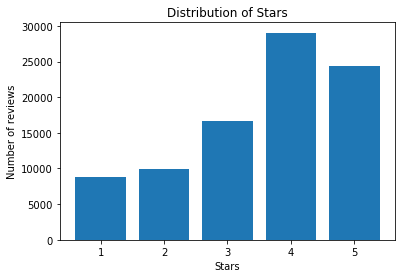

In [6]:
# The Stars distribution 
values, counts = np.unique(df['stars'], return_counts=True)

plt.figure()
plt.bar(values, counts, tick_label=['1','2','3','4','5'])
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Number of reviews')
plt.show()

****In this section, we classify our reviews rating into two classes of 0 (Negative for rating less than 3) and 1(Positive for rating >= 3) by creating new column as the "Target" for further processing.****

In [7]:
# Create new column "Target" that stored 0's or 1's. 0 being Negative, 1 being Positive
df["Target"] = np.where(df["stars"] >= 3, 1, 0)
df.head(3)

,Unnamed: 0,business_id,name,review_id,user_id,stars,date,text,useful,funny,cool,Target
0,0,nbhBRhZtdaZmMMeb2i02pg,"""Sunnyside Grill""",ydylyPxEf07AVLMZVX4Dvg,Ri3cu8XTnyA83pyJrzTMvw,5,2017-06-24,Great place to eat! I had the bacon burger wit...,1,0,0,1
1,1,nbhBRhZtdaZmMMeb2i02pg,"""Sunnyside Grill""",rPe7iEdzBsC2JYfvhfgXCA,iJJa3xVPSJcTjbB_GQRQxA,5,2017-09-28,This is an amazing place to eat breakfast. As ...,0,0,0,1
2,2,nbhBRhZtdaZmMMeb2i02pg,"""Sunnyside Grill""",7_61l7790iHRMsi8nlX3QA,oP2OWb5GTvFI6rde2ZRYbg,5,2017-12-09,You gotta come here for the value and great se...,0,0,0,1


In [8]:
# Picking the only text and target column
df_final = df[['text','Target']]

In [9]:
df_final.head(5)

,text,Target
0,Great place to eat! I had the bacon burger wit...,1
1,This is an amazing place to eat breakfast. As ...,1
2,You gotta come here for the value and great se...,1
3,Probably the worst spot in the entire food cou...,0
4,"If you are all about quantity, this is the pla...",1


# Word Cloud
****As a word cloud is a graphical representation of frequently used words in the texts so we are going to investigate the frequency of words in the reviews.****

In [10]:
from wordcloud import WordCloud
from os import path
from PIL import Image
# Dividing the reviews to positive and negative
pos = df_final[df_final['Target']==1]['text']
neg = df_final[df_final['Target']==0]['text']

* ## Positive review word cloud
****we can idicate the frequency of occurrence of the word in the Positive reviews or compliments.
We can see some interesting words like “quarantined” in positive reviews.****

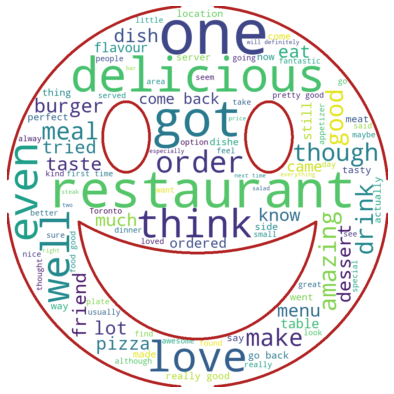

In [11]:
# Mask image
pos_mask = np.array(Image.open("/kaggle/input/positive/smile.png"))

text_pos = " ".join(i for i in pos)

# Create a word cloud image
wc_pos = WordCloud(background_color="white", max_words=100, mask=pos_mask, contour_width=10, contour_color='firebrick')

# Generate a wordcloud
wc_pos.generate(text_pos)

plt.figure(figsize=(14,7))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

* ## Negative review word cloud
****Using word cloud to show the frequency of words in negative reviews or complains.****

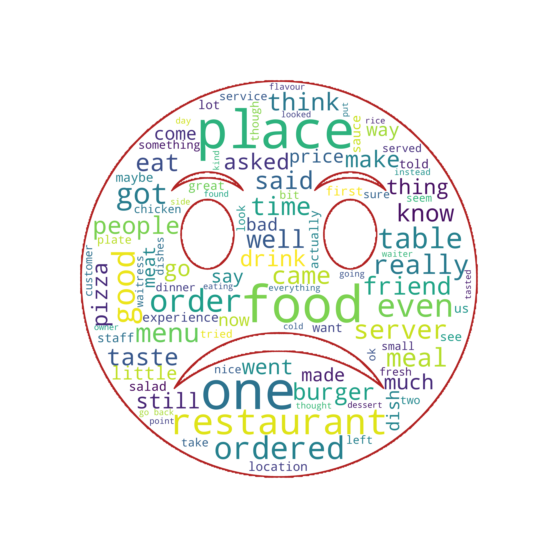

In [13]:
# Mask image
neg_mask = np.array(Image.open("/kaggle/input/madness/m.jpg"))
                    
# Create a word cloud image
text_neg = " ".join(i for i in neg)

# Create a word cloud image
wc_neg = WordCloud(background_color="white", max_words=100, mask=neg_mask, contour_width=25, contour_color='firebrick', max_font_size=500)

# Generate a wordcloud
wc_neg.generate(text_neg)

plt.figure(figsize=(20,10))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

# Split the data into train and test set

****In order to train the classifier, we need to devide the dataset into train and test datasets. So we are going to split the reviews by 80:20 for train and test data. Before splitting the data, we create the *function_clean* to clean up reviews.****

In [15]:
import re 
def function_clean(text):
    text = re.sub(r"http\S+", "", text) #removing the URL Http
    # Removal of mentions
    text = re.sub("@[^\s]*", "", text)
    # Removal of hashtags
    text = re.sub("#[^\s]*", "", text)
    # Removal of numbers
    text = re.sub('[0-9]*[+-:]*[0-9]+', '', text)
    text = re.sub("'s", "", text)   
    return text

In [16]:
# applying the cleaning function to text column
df_final['text'] = df_final['text'].apply(lambda text: function_clean(text))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
#Splitting the data to train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_final["text"]
y = df_final["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [18]:
y.value_counts()

1    70082
0    18844
Name: Target, dtype: int64

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((71140,), (17786,), (71140,), (17786,))

# Preprocessing the data
****Now it is time to preprocess the reviews because all these modifications will directly affect the classifier’s performance. As we are going to use words as features so we can use some text formatting techniques which will help us in feature extraction including removing punctuation marks/digits ,and also stop-words. In addition, the implementation of lemmatization words using NLTK can be workable to maximize the performance. Tokenization is the last step to break reviews up into words and other meaningful tokens.****

In [20]:
import string
#nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords 
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):

    listofwords = sentence.strip().split()          # to remove any space from beginning and the end of text
    listof_words = []    
    for word in listofwords:
        if not word in ENGLISH_STOP_WORDS:
            lemm_word = WordNetLemmatizer().lemmatize(word)
            # remove the stop words
            for punctuation_mark in string.punctuation:
                word = word.replace(punctuation_mark, '').lower()
            if len(word)>0:
                listof_words.append(word)
    return(listof_words)

# Vectorizing the text using TF_IDF

****By implementing the sklearn library, we can use TF_IDF vectorizing to find the weighted words that occur more frequently in the document that leads to creation of the bag of words model. So our features will be the words or sequence of words of these reviews. We are going to explore different models with the combinations of n_grams (unigrams,bigrams,trigrams).****

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect_1 = TfidfVectorizer(min_df=100,tokenizer=my_tokenizer, stop_words={'english'}, ngram_range=(1,3)).fit(X_train)
X_train1 = vect_1.transform(X_train)
X_test1 = vect_1.transform(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [22]:
new_df_words = pd.DataFrame(columns=vect_1.get_feature_names(), data=X_train1.toarray())
new_df_words

,a,able,able get,about,above,absolute,absolutely,absolutely amazing,absolutely delicious,absolutely love,...,york,yorkville,you,young,younger,yourself,yum,yummy,zero,zucchini
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.087923,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71135,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71136,0.0,0.091839,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71137,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71138,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#counting most repetitive words 
word_counts = np.array(np.sum(X_train1, axis=0)).reshape((-1,))
words = np.array(vect_1.get_feature_names())
words_df = pd.DataFrame({"word":words, "count":word_counts})
words_df.sort_values(by="count",ascending=False).head(20)

,word,count
2027,food,2381.690919
2391,good,2139.397232
4179,place,2050.319440
2519,great,1791.249780
5018,service,1584.163398
3233,like,1412.869184
4581,really,1340.171264
3864,one,1256.306443
919,chicken,1218.312137
6391,would,1169.812918


# Let's Smote 
****The only challenge that we’ve faced was about balancing the train dataset in terms of having the equal numbers of positive and negative reviews for our two classes. So we are using SMOTE to balanace our target(class) column.****

In [24]:
from imblearn.over_sampling import SMOTE

#SMOTE the training data
sm = SMOTE(random_state=1)
X_bal, y_bal = sm.fit_resample(X_train1, y_train)

Using TensorFlow backend.


In [25]:
y_bal.value_counts()

1    56062
0    56062
Name: Target, dtype: int64

# Modeling
****As the sentiment-classifier system has many applications from business to social sciences,  the natural language processing and machine learning techniques are used to create the classifiers in order to explore the polarity of the reviews easily. Hence, we analyze the reviews given by the customers for the restaurant with the the implementation of various classification algorithms such as Logistic Regression, Random Forest(RF), XGboost.****

## 1. Logistic Regression

In [26]:
# fitting a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Fitting Logistic regression to the training set
logreg = LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1)
logreg.fit(X_bal, y_bal)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test1)

# Training score
print(f"Score on training set: {logreg.score(X_train1,y_train)}")
print(f"Score on test set: {logreg.score(X_test1,y_test)}")

Score on training set: 0.9075766095023896
Score on test set: 0.8903632070167548


## Model Evaluation
**** As shown above, our model test accuracy is 0.89. In order to evaluate the model further, we can extract some important evaluation metrics from the classification report such as precision, recall, and f1_score. As shown in the following report, as the f1_score is 0.92 for class 1 and 0.76 for class 0, therefore we can conclude this model is better in predicting positive reviews than negative ones.**** 

In [27]:
from sklearn.metrics import classification_report
print('The Confusion Matrix')
con_mat_lr = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr = pd.DataFrame(con_mat_lr, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr)
print('The Classification report')
report = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

The Confusion Matrix


,Predicted 0,Predicted 1
True 0,3107,659
True 1,1291,12729


The Classification report


,precision,recall,f1-score,support
0,0.706457,0.825013,0.761146,3766.000000
1,0.950777,0.907917,0.928853,14020.000000
accuracy,0.890363,0.890363,0.890363,0.890363
macro avg,0.828617,0.866465,0.845000,17786.000000
weighted avg,0.899045,0.890363,0.893343,17786.000000


* ### Grid search (logistic)
****Let's now try to optimize some hyperparameters. We will start off with the logistic regression by finding out the optimal value for parameter C by applying the Grid search.****

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

In [29]:
fitted_search = grid_search.fit(X_bal, y_bal)

In [30]:
fitted_search.best_estimator_

Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

****After grid search we found our optimal parameter and applied in the our model. As a result, the train and test accuracy slightly are increased.****

In [31]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_bal, y_bal)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test1)

# Training score
print(f"Score on training set: {logreg.score(X_train1,y_train)}")
print(f"Score on test set: {logreg.score(X_test1,y_test)}")

# Creating confusion matrix/ dataFrame
con_mat_lr = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr = pd.DataFrame(con_mat_lr, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
df_cm_lr

Score on training set: 0.9236716333989317
Score on test set: 0.8907567749915664


,Predicted 0,Predicted 1
True 0,3085,681
True 1,1262,12758


## 2. Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

my_random_forest = RandomForestClassifier(random_state=1)
my_random_forest.fit(X_bal, y_bal)
print(f"Random Forest: {my_random_forest.score(X_bal, y_bal)}")
print(f"Random Forest: {my_random_forest.score(X_test1, y_test)}")

Random Forest: 0.9998573008454925
Random Forest: 0.8778814798155853


****To find the optimal *n_estimators* parameter, we are going to try various number of *n_estimators* as shown below.****

In [33]:
dt_train=[]
dt_test=[]
depth=[]
for i in range(1,15):
    my_random_forest = RandomForestClassifier(n_estimators=i,random_state=1)
    my_random_forest.fit(X_bal, y_bal)
    dt_train.append(my_random_forest.score(X_bal, y_bal))
    dt_test.append(my_random_forest.score(X_test1, y_test))
    depth.append(i)

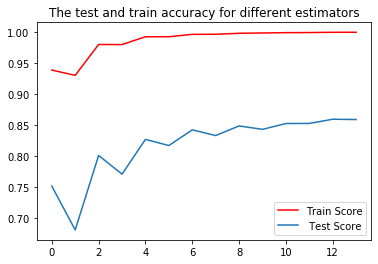

13


In [34]:
plt.figure()
plt.title('The test and train accuracy for different estimators')
plt.plot(dt_train,color='red',label='Train Score')
plt.plot(dt_test,label=' Test Score')
plt.legend()
plt.show()
print(depth[np.argmax(dt_test)])

In [43]:
my_random_forest = RandomForestClassifier(n_estimators=13,random_state=1)
my_random_forest.fit(X_bal, y_bal)
print(f"Random Forest train: {my_random_forest.score(X_bal, y_bal)}")
print(f"Random Forest test: {my_random_forest.score(X_test1, y_test)}")

Random Forest train: 0.999143805072955
Random Forest test: 0.8568537051613628


****Now we found the optimal *n_estimators * as 13, the both train and test accuracy are increased. ****

In [44]:
# Predicting the test set results
y_pred_rand = my_random_forest.predict(X_test1)

In [45]:
# Creating confusion matrix/ dataFrame
con_mat_RF = confusion_matrix(y_test, y_pred_rand)
df_cm_RF = pd.DataFrame(con_mat_RF, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
df_cm_RF

,Predicted 0,Predicted 1
True 0,2042,1724
True 1,822,13198


##  3. XGboost

In [46]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(random_state=1)
XGB_model.fit(X_bal, y_bal)

print(f"XG Boost train score: {XGB_model.score(X_bal, y_bal)}")
print(f"XG Boost test score: {XGB_model.score(X_test1, y_test)}")

XG Boost train score: 0.9366148193071956
XG Boost test score: 0.8822669515349151


#### ****As a result, among the all three models, the Logistic Regression gave us the highest test accuracy score as 0.89 and after that the XGboost with 0.88.****

# Testing
**** In this stage, after creating the different classification models, now we can use them to predict the sentiment of the restaurant reviews.****

# (Negative review):
# "The waiting time was really long."
<img src="https://cdn.shopify.com/s/files/1/1061/1924/products/Super_Angry_Face_Emoji_ios10_large.png?v=1571606092" width="200px" style="float:top" > 


In [47]:
input_string = "The waiting time was really long."
print("\nPrediction on an input string: " + input_string)
print("Logistic Regression model:",logreg.predict(vect_1.transform([function_clean(input_string)])))
print("Random Forest model      :",my_random_forest.predict(vect_1.transform([function_clean(input_string)])))
print("XGboost model            :",XGB_model.predict(vect_1.transform([function_clean(input_string)])))


Prediction on an input string: The waiting time was really long.
Logistic Regression model: [0]
Random Forest model      : [0]
XGboost model            : [0]


# (Positive review)
# "people that works here for sure is friendly! :) I do love that big menu."
   <img src="https://i.pinimg.com/564x/ce/6c/3c/ce6c3c20878b5c690fe3916c62d9195b.jpg" width="240px" style="float:center" > 

In [48]:
input_string = " people that works here for sure is friendly! :)I do love that big menu book and seems like there are a lot of items to choose from. This is always nice as Vietnamese food is definitely more than pho and more spring rolls."
print("\nPrediction on an input string: " + input_string)
print("Logistic Regression model:",logreg.predict(vect_1.transform([function_clean(input_string)])))
print("Random Forest model      :",my_random_forest.predict(vect_1.transform([function_clean(input_string)])))
print("XGboost model            :",XGB_model.predict(vect_1.transform([function_clean(input_string)])))


Prediction on an input string:  people that works here for sure is friendly! :)I do love that big menu book and seems like there are a lot of items to choose from. This is always nice as Vietnamese food is definitely more than pho and more spring rolls.
Logistic Regression model: [1]
Random Forest model      : [1]
XGboost model            : [1]


# Hurray! Here we go. Hope you enjoyed and learned from our project:)